In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import yfinance as yf 

from datetime import datetime, timedelta

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [2]:
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

In [3]:
stocks = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
company_names = ['Apple', 'Google', 'Microsoft', 'Amazon']
dfs = []

end_date = datetime(2023, 10, 29)
start_date = datetime(end_date.year - 1, end_date.month, end_date.day)

for stock in stocks:
    df = yf.Ticker(stock).history(start=start_date, end=end_date)
    dfs.append(df)

for index, company_name in enumerate(company_names):
    dfs[index]['company_name'] = company_name


In [4]:
apple = dfs[0]
apple

,Open,High,Low,Close,Volume,Dividends,Stock Splits,company_name
Date,,,,,,,,
2022-10-31 00:00:00-04:00,152.056412,153.128632,150.825341,152.235107,97943200,0.00,0.0,Apple
2022-11-01 00:00:00-04:00,153.962603,154.329932,148.055477,149.564514,80379300,0.00,0.0,Apple
2022-11-02 00:00:00-04:00,147.876769,151.073570,143.955233,143.985016,93604600,0.00,0.0,Apple
2022-11-03 00:00:00-04:00,141.036413,141.771087,137.750265,137.879333,97918500,0.00,0.0,Apple
2022-11-04 00:00:00-04:00,141.300210,141.876988,133.633073,137.610840,140814800,0.23,0.0,Apple
...,...,...,...,...,...,...,...,...
2023-10-23 00:00:00-04:00,170.685138,173.781050,169.706417,172.772385,55980100,0.00,0.0,Apple
2023-10-24 00:00:00-04:00,172.822321,173.441500,171.224420,173.211807,43816600,0.00,0.0,Apple
2023-10-25 00:00:00-04:00,171.653866,172.832306,170.425473,170.874893,57157000,0.00,0.0,Apple


In [5]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2022-10-31 00:00:00-04:00 to 2023-10-27 00:00:00-04:00
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          250 non-null    float64
 1   High          250 non-null    float64
 2   Low           250 non-null    float64
 3   Close         250 non-null    float64
 4   Volume        250 non-null    int64  
 5   Dividends     250 non-null    float64
 6   Stock Splits  250 non-null    float64
 7   company_name  250 non-null    object 
dtypes: float64(6), int64(1), object(1)
memory usage: 17.6+ KB


In [6]:
apple.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,250.000000,250.000000,250.000000,250.000000,2.500000e+02,250.000000,250.0
mean,163.779231,165.440262,162.273360,163.912794,6.417777e+07,0.003760,0.0
std,18.792629,18.630593,19.013476,18.802685,2.001017e+07,0.029553,0.0
min,125.309594,127.059795,123.479803,124.325081,3.145820e+07,0.000000,0.0
25%,147.925660,149.819746,146.619163,148.049313,5.042202e+07,0.000000,0.0
50%,167.249840,168.950746,165.968345,167.341194,5.891015e+07,0.000000,0.0
75%,177.965373,179.633653,176.840180,178.319180,7.134730e+07,0.000000,0.0
max,195.717515,197.702207,194.760064,195.926956,1.601569e+08,0.240000,0.0


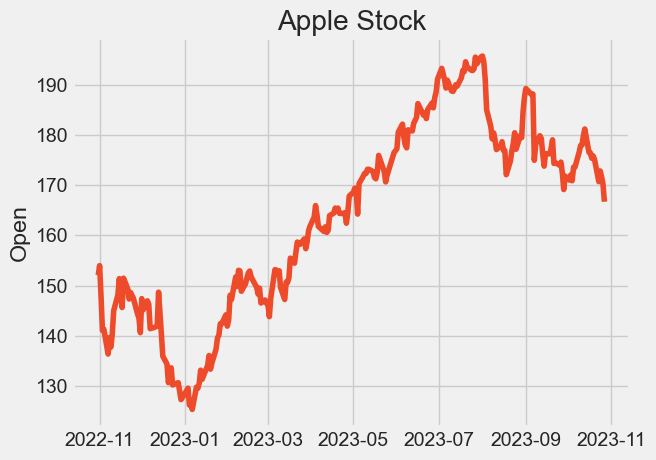

In [7]:
color = '#EE4B2B'
plt.plot(apple['Open'], c=color)
plt.ylabel('Open')
plt.title('Apple Stock')
plt.show()

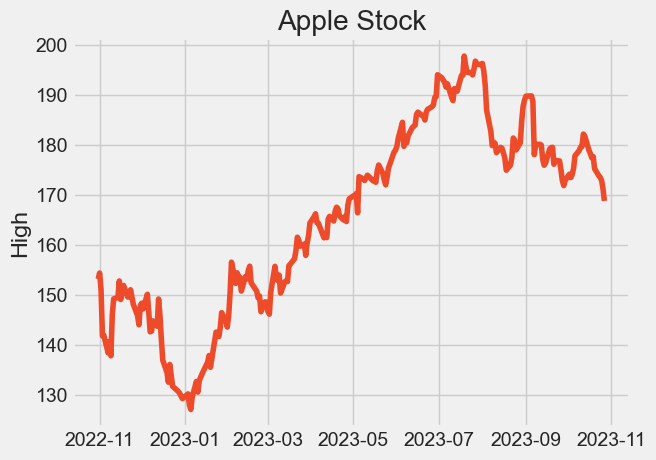

In [8]:
plt.plot(apple['High'], color=color)
plt.ylabel('High')
plt.title('Apple Stock')
plt.show()

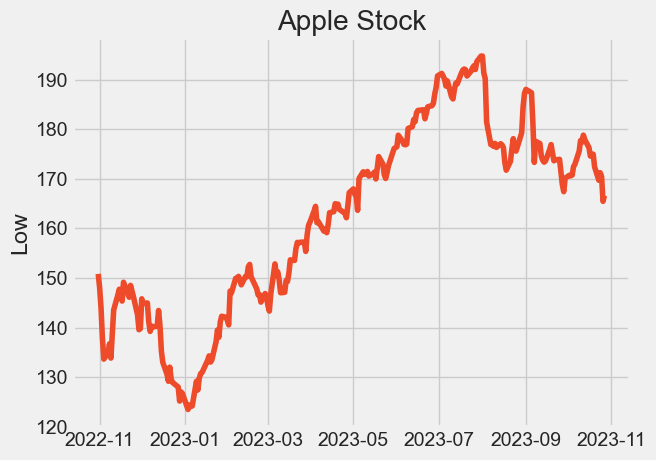

In [9]:
plt.plot(apple['Low'], color=color)
plt.ylabel('Low')
plt.title('Apple Stock')
plt.show()

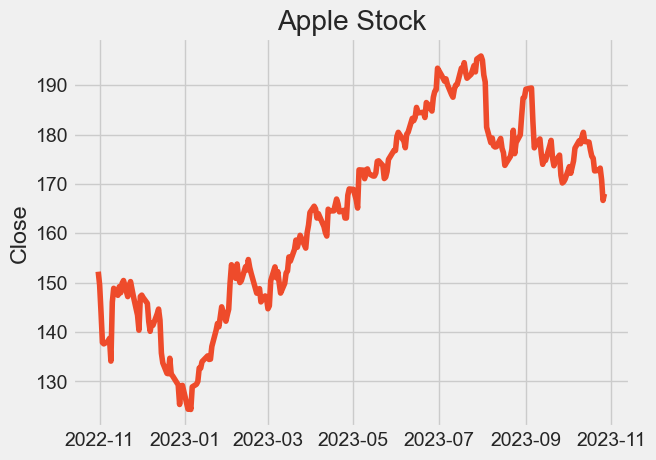

In [10]:
plt.plot(apple['Close'], color=color)
plt.ylabel('Close')
plt.title('Apple Stock')
plt.show()

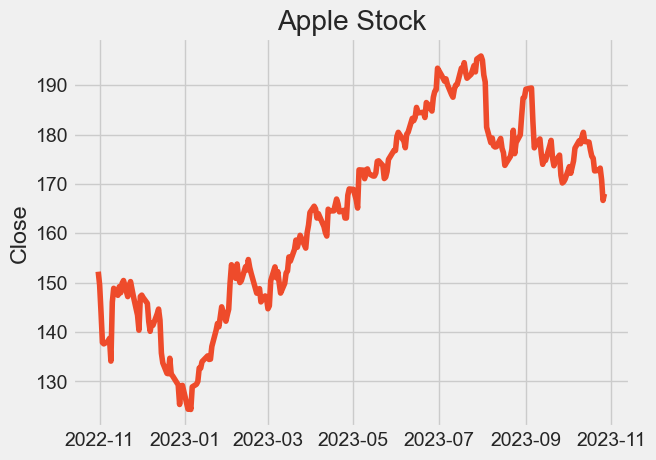

In [11]:
plt.plot(apple['Close'], color=color)
plt.ylabel('Close')
plt.title('Apple Stock')
plt.show()

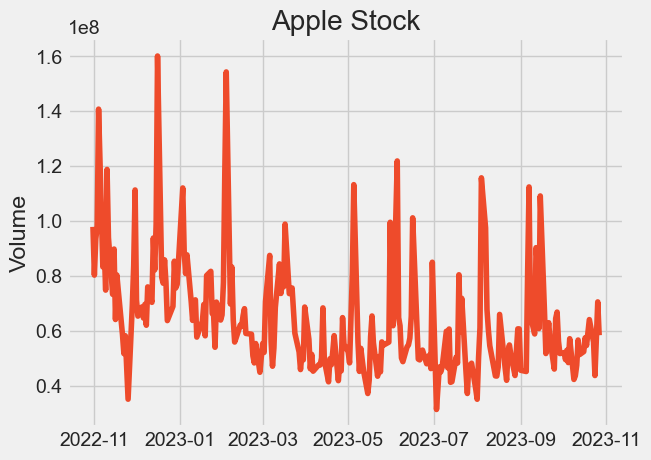

In [12]:
plt.plot(apple['Volume'], color=color)
plt.ylabel('Volume')
plt.title('Apple Stock')
plt.show()

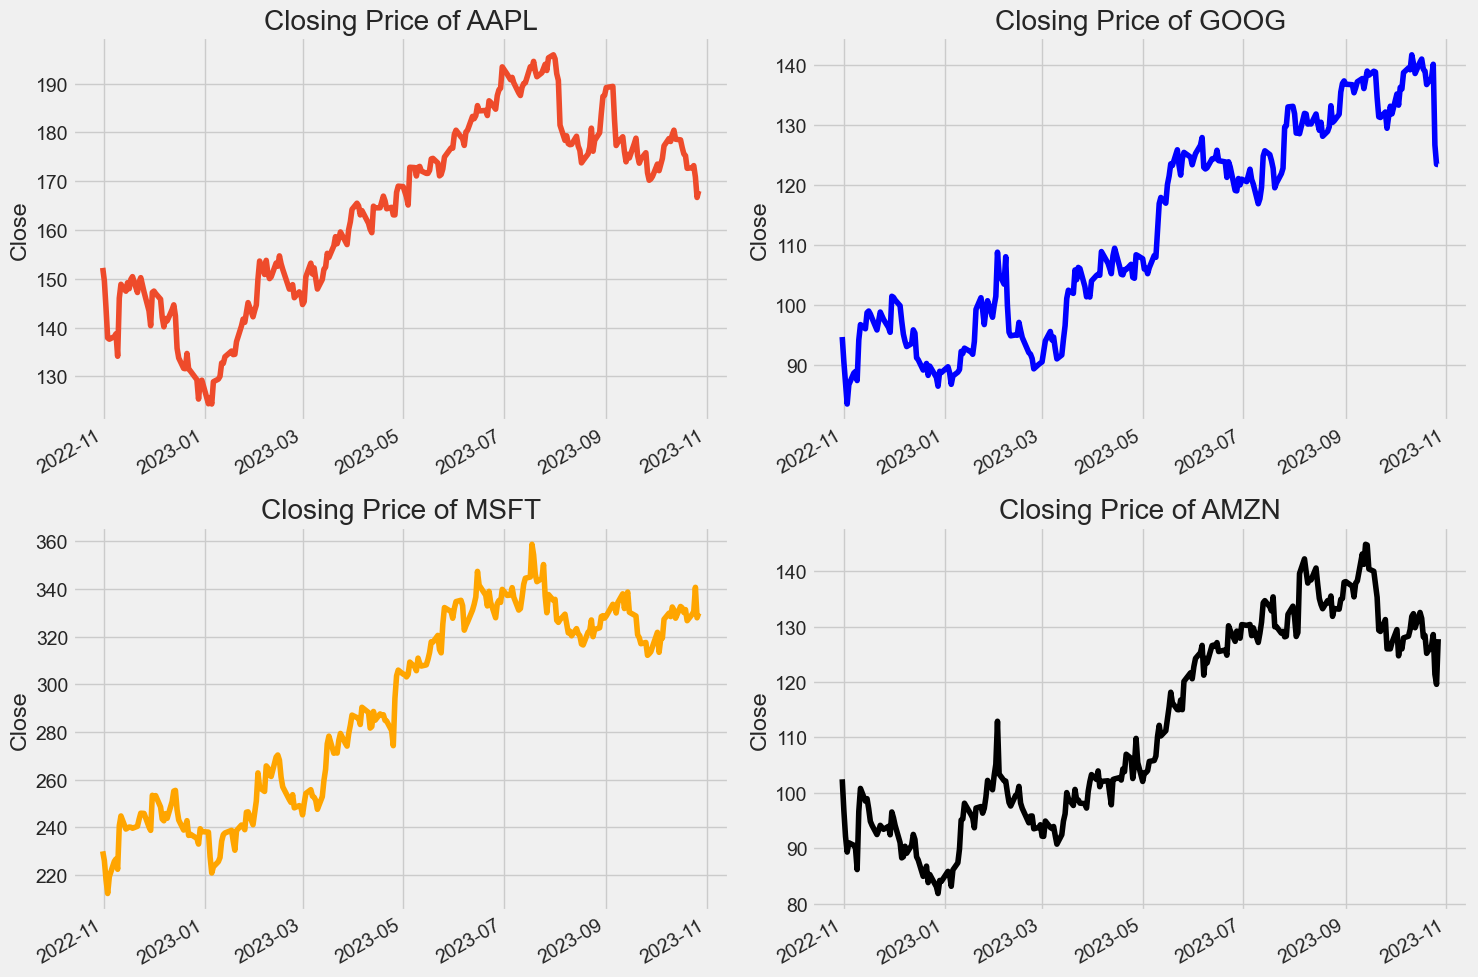

In [13]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)
colors = [color, 'blue', 'orange', 'black']

for i, company in enumerate(dfs, 1):
    plt.subplot(2, 2, i)
    company['Close'].plot(color=colors[i - 1])
    plt.ylabel('Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {stocks[i - 1]}")
    
plt.tight_layout()

In [14]:
end_date = datetime(2023, 10, 29)
start_date = datetime(end_date.year - 10, end_date.month, end_date.day)

df = yf.Ticker(stocks[0]).history(start=start_date, end=end_date)
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2013-10-29 00:00:00-04:00,16.693369,16.786132,16.016943,16.083557,635807200,0.0,0.0
2013-10-30 00:00:00-04:00,16.174763,16.420990,16.094139,16.339434,354163600,0.0,0.0
2013-10-31 00:00:00-04:00,16.342555,16.420065,16.226444,16.270958,275696400,0.0,0.0
2013-11-01 00:00:00-04:00,16.312041,16.336321,16.057408,16.187838,274890000,0.0,0.0
2013-11-04 00:00:00-05:00,16.221154,16.399211,16.149870,16.397032,244627600,0.0,0.0
...,...,...,...,...,...,...,...
2023-10-23 00:00:00-04:00,170.685138,173.781050,169.706417,172.772385,55980100,0.0,0.0
2023-10-24 00:00:00-04:00,172.822321,173.441500,171.224420,173.211807,43816600,0.0,0.0
2023-10-25 00:00:00-04:00,171.653866,172.832306,170.425473,170.874893,57157000,0.0,0.0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2013-10-29 00:00:00-04:00 to 2023-10-27 00:00:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          2517 non-null   float64
 1   High          2517 non-null   float64
 2   Low           2517 non-null   float64
 3   Close         2517 non-null   float64
 4   Volume        2517 non-null   int64  
 5   Dividends     2517 non-null   float64
 6   Stock Splits  2517 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 157.3 KB


In [16]:
data = df.filter(['Close'])
dataset = data.values.reshape(-1, 1)
training_data_len = int(np.ceil( len(dataset) * .95 ))
test_data_len = int(np.ceil( len(dataset) * .05 ))
training_data_len

2392

In [17]:
test_data_len

126

In [18]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00241425],
       [0.00383358],
       [0.00345375],
       ...,
       [0.86103698],
       [0.83771493],
       [0.84508268]])

In [19]:
train_data = scaled_data[0 : int(training_data_len), :]

In [20]:
train_data = scaled_data[0:int(training_data_len), :]
WINDOW_SIZE = 60
x_train = []
y_train = []

for i in range(WINDOW_SIZE, len(train_data)):
    x_train.append(train_data[i-WINDOW_SIZE:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.00241425, 0.00383358, 0.00345375, 0.00299269, 0.00415308,
       0.00392858, 0.00367152, 0.00220747, 0.00360903, 0.00334676,
       0.00351351, 0.00362116, 0.00492895, 0.00437841, 0.0032738 ,
       0.00343359, 0.00264337, 0.00370972, 0.00347701, 0.00416133,
       0.00583906, 0.00802045, 0.00977629, 0.00893575, 0.01155653,
       0.01132726, 0.01183089, 0.01046236, 0.01157566, 0.01142278,
       0.01069507, 0.01055264, 0.00949147, 0.01002465, 0.00958874,
       0.00885582, 0.00775992, 0.00855192, 0.01221127, 0.011791  ,
       0.01113621, 0.01047448, 0.00950709, 0.01063601, 0.00926571,
       0.00715553, 0.00766785, 0.00699226, 0.00758625, 0.00638092,
       0.00575916, 0.0062437 , 0.00809513, 0.01000034, 0.0094602 ,
       0.00710166, 0.00856059, 0.00898434, 0.00979544, 0.00803955])]
[0.008808926937356451]

[array([0.00241425, 0.00383358, 0.00345375, 0.00299269, 0.00415308,
       0.00392858, 0.00367152, 0.00220747, 0.00360903, 0.00334676,
       0.00351351, 0.00362116, 0.0

In [21]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [22]:
x_train.shape, y_train.shape

((2332, 60), (2332,))

In [23]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [24]:
x_train.shape

(2332, 60, 1)

In [25]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x_train, y_train, batch_size=1, epochs=1)

2332/2332 [==============================] - 91s 37ms/step - loss: 0.0010


In [26]:
test_data = scaled_data[training_data_len - 60: , :]

x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
x_test = np.array(x_test)


In [27]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [28]:
predictions = model.predict(x_test)

4/4 [==============================] - 2s 41ms/step


In [29]:
predictions.shape

(125, 1)

In [30]:
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print(f'rmse = {rmse}')

rmse = 8.071578463235172


C:\Users\Tacab\AppData\Local\Temp\ipykernel_8316\2603199341.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


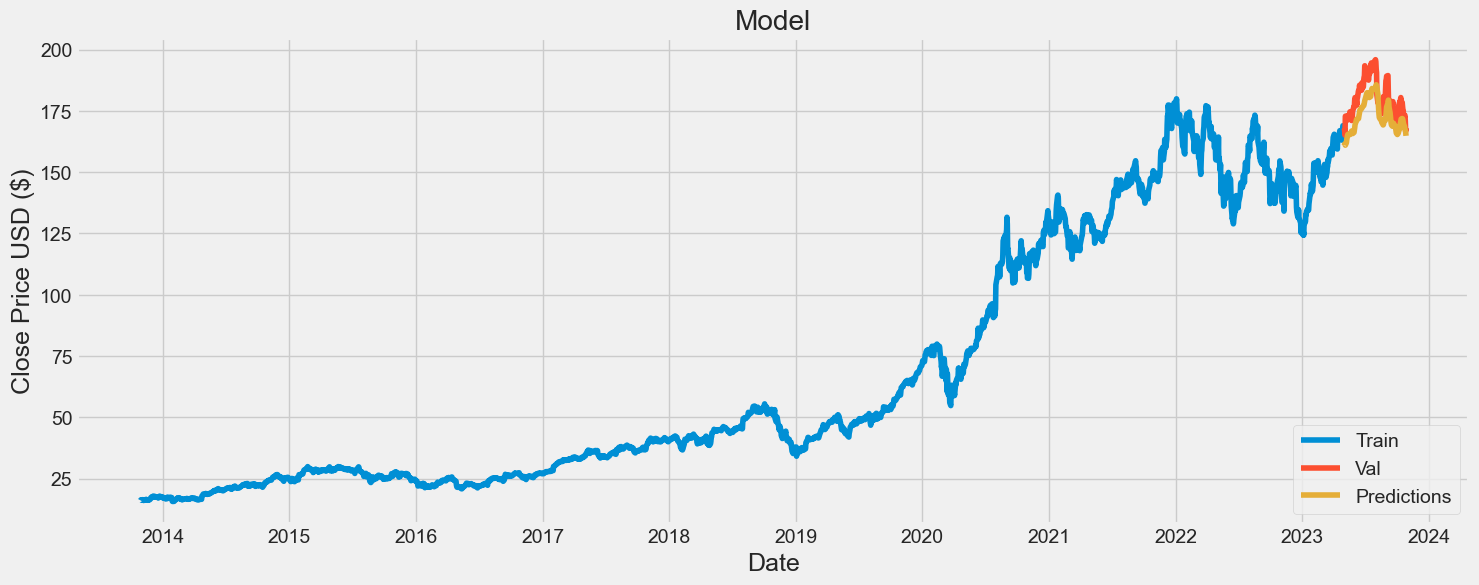

In [31]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()